## Logistic Regression: Multiclass Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we'd have to first transform it into a feature vector with length 64.

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

all these images are represented as array

Print all af the hand written digits 

<Figure size 640x480 with 0 Axes>

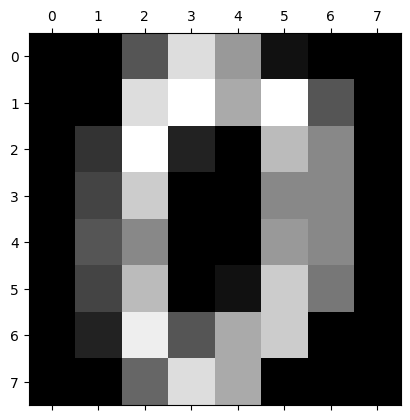

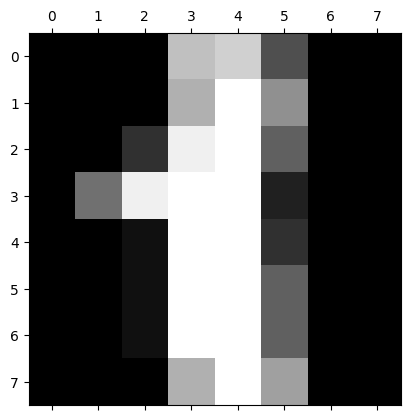

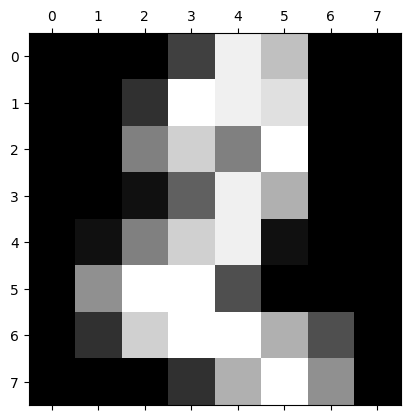

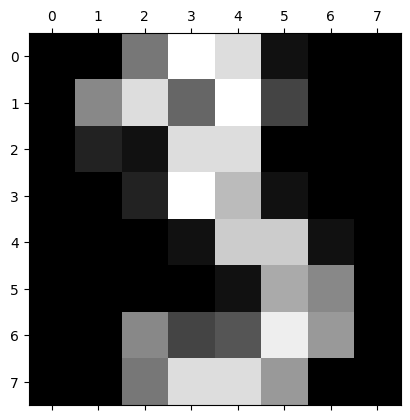

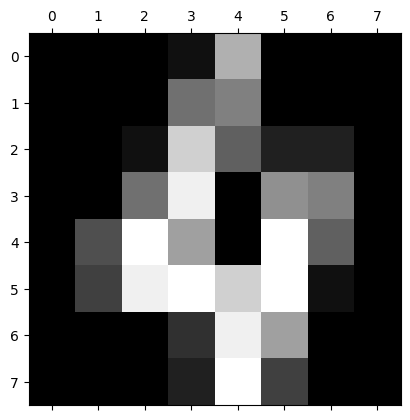

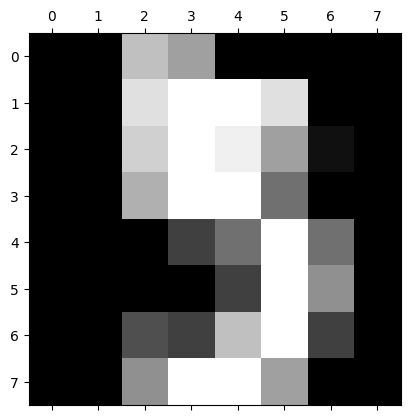

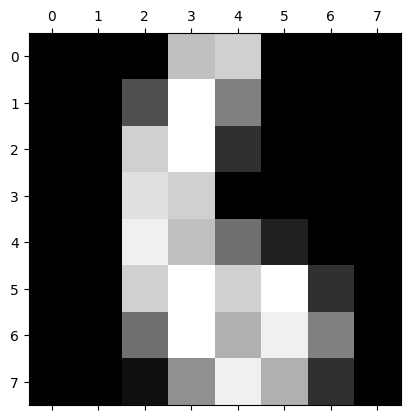

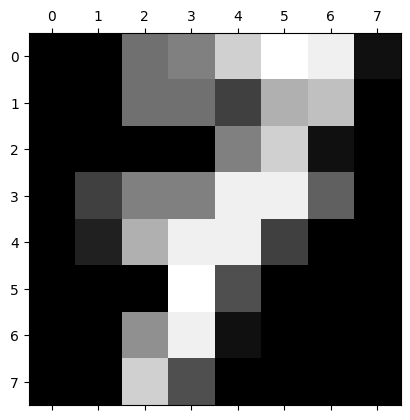

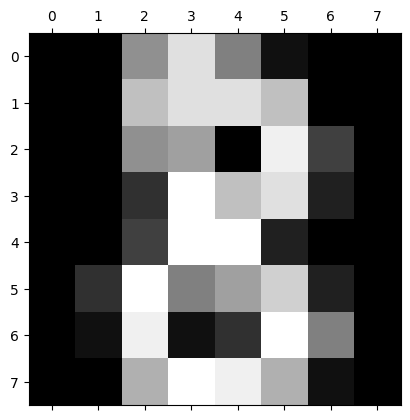

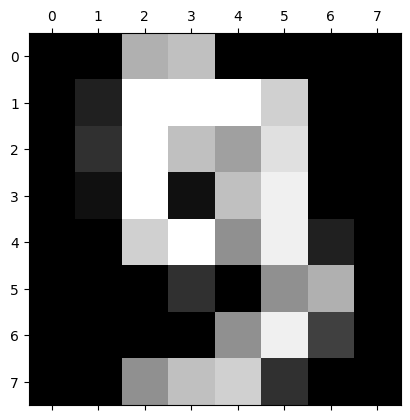

In [5]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [6]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

we can use data and target to train our model properly

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [9]:
len(X_train)

1437

In [10]:
len(X_test)

360

Here x train has the data images which is taken from the sklearn dataset and then y train has the target data .

### Create and train logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()



In [12]:
model.fit(X_train,Y_train)

c:\Users\AU Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Measure accuracy of our model

In [13]:
model.score(X_test,Y_test)

0.975

Here we see that our prediction model has 96% accuracy rate. That means this model identify any hand written digits easily .

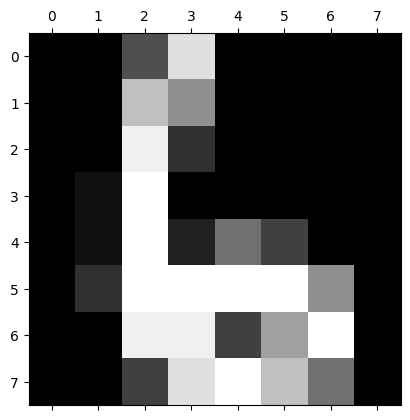

In [14]:
plt.matshow(digits.images[67])

In [15]:
digits.target[67]

6

In [16]:
model.predict([digits.data[67]])

array([6])

In [17]:
model.predict(digits.data[23:67])

array([3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6])

#### A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm

## Confusion matrix

In [18]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,y_predicted)
cm

array([[37,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 45,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 34]], dtype=int64)

Plot a heatmap for confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

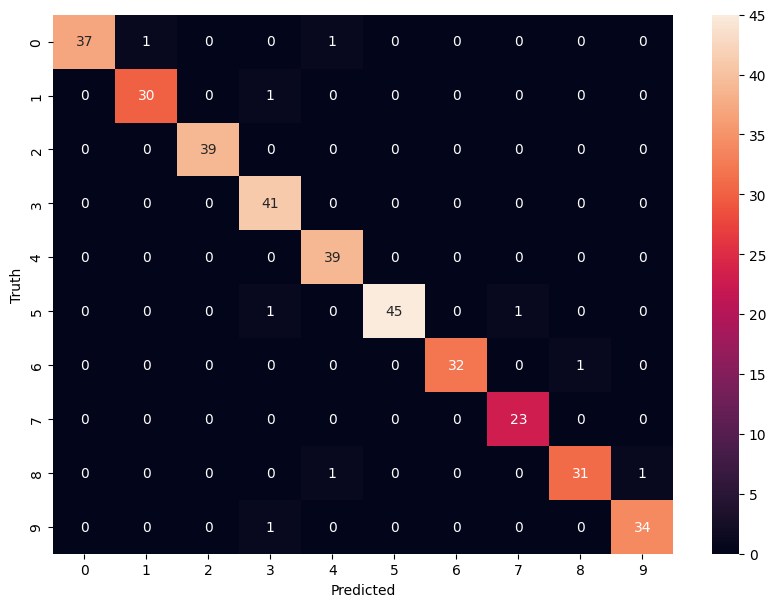

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Create a model of Hand wirtten digits prediction 


In [20]:
import pickle

with open('Hand _WRmodel','wb') as f:
    
    pickle.dump(model,f)